In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [54]:
labels_df = pd.read_csv("labels.csv")

In [70]:
def load_features(files, path, labels_df):
    dataframes = []
    
    for file in files:
        df = pd.read_csv(f"{path}/{file}", header=None)
        participant_id = int(file.split("_")[1].split(".")[0]) # Get ID from file name
        df["Participant_ID"] = participant_id
        dataframes.append(df)
        
    # Combine into a single dataframe
    data_df = pd.concat(dataframes)
    return data_df.merge(labels_df, on="Participant_ID")
color_dict = {
    'all features': 'mediumpurple',
    'top performing features (depression)': 'darkviolet',
    'top perfoming features (gender)': 'plum',
    'SBR features': 'indigo',
    'AER features': 'plum'
}
def calculate_accuracy(y_true, y_pred, group, display_results=True):
    # Calculate Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    
    # Extract TP, FP, TN, FN
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    tpr = tp / (tp + fn) # True Positive Rate
    tnr = tn / (tn + fp) # True Negative Rate
    fpr = fp / (fp + tn) # False Positive Rate
    fnr = fn / (fn + tp) # False Negative Rate
    
    # Store metrics
    metrics = {
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy,
        "tpr": tpr,
        "tnr": tnr,
        "fpr": fpr,
        "fnr": fnr
    }
    if display_results:
        print(f"Metrics for {group}:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
        print(f"True Positive Rate (TPR): {tpr:.2f}")
        print(f"True Negative Rate (TNR): {tnr:.2f}")
        print(f"False Positive Rate (FPR): {fpr:.2f}")
        print(f"False Negative Rate (FNR): {fnr:.2f}")
    
    return metrics
def analyze_results(y_pred, display_results=True, pred_label='Depression', threshold = 0.05):
    test_df_copy = test_df.copy()
    test_df_copy["predictions"] = y_pred
    # Group by participant and average predictions 
    participant_predictions = test_df_copy.groupby("Participant_ID")["predictions"].mean()

    participant_predictions_binarized = (participant_predictions >= threshold).astype(int)

    # Join aggregated predictions back with the depression labels
    participant_labels = test_df.groupby("Participant_ID")[pred_label].first()

    # Filter data by gender
    male_participants = test_df[test_df["Gender"] == 1]["Participant_ID"].unique()
    female_participants = test_df[test_df["Gender"] == 0]["Participant_ID"].unique()

    # Calculate accuracies for all, male, and female participants
    all_metrics_depression = calculate_accuracy(participant_labels, 
                                                participant_predictions_binarized, "All participants",
                                                display_results=display_results)
    if display_results:
        print("")
    male_metrics = calculate_accuracy(participant_labels.loc[male_participants],
                                       participant_predictions_binarized.loc[male_participants], "Male participants",
                                       display_results=display_results)
    if display_results:
        print("")
    female_metrics = calculate_accuracy(participant_labels.loc[female_participants], 
                                        participant_predictions_binarized.loc[female_participants],
                                          "Female participants", display_results=display_results)

    # Calculate EO
    eo = (1 - abs(male_metrics["tpr"] - female_metrics["tpr"]))
    if display_results:
        print(f"Equality of Opportunity (EO): {eo:.2f}")

    return all_metrics_depression, male_metrics, female_metrics, eo
def bar_graph(vals:dict, measures:list, title:str):
    x = np.arange(len(measures))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(12, 7))
    for attribute, measurement in vals.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color_dict[attribute])
        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x + width, measures)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)
    fig.tight_layout()
    plt.show()

In [56]:
train_files = ["spk_303.csv", "spk_304.csv", "spk_310.csv", "spk_313.csv", "spk_316.csv", "spk_317.csv", "spk_318.csv", "spk_319.csv", "spk_322.csv", "spk_324.csv", 
               "spk_326.csv", "spk_327.csv", "spk_328.csv", "spk_330.csv", "spk_333.csv", "spk_338.csv", "spk_339.csv", "spk_340.csv", "spk_341.csv", "spk_343.csv", 
               "spk_344.csv", "spk_345.csv", "spk_347.csv", "spk_350.csv", "spk_351.csv", "spk_352.csv", "spk_353.csv", "spk_356.csv", "spk_357.csv", "spk_358.csv", 
               "spk_360.csv", "spk_364.csv", "spk_366.csv", "spk_369.csv", "spk_370.csv", "spk_371.csv", "spk_372.csv", "spk_374.csv", "spk_375.csv", "spk_376.csv", 
               "spk_379.csv", "spk_380.csv", "spk_383.csv", "spk_385.csv", "spk_386.csv", "spk_391.csv", "spk_392.csv", "spk_397.csv", "spk_400.csv", "spk_401.csv", 
               "spk_402.csv", "spk_409.csv", "spk_412.csv", "spk_414.csv", "spk_416.csv", "spk_419.csv", "spk_423.csv", "spk_425.csv", "spk_426.csv", "spk_427.csv", 
               "spk_428.csv", "spk_429.csv", "spk_430.csv", "spk_433.csv", "spk_441.csv", "spk_443.csv", "spk_445.csv", "spk_447.csv", "spk_448.csv", "spk_449.csv", 
               "spk_454.csv", "spk_455.csv", "spk_456.csv", "spk_457.csv", "spk_459.csv", "spk_463.csv", "spk_464.csv", "spk_468.csv", "spk_471.csv", "spk_473.csv", 
               "spk_475.csv", "spk_478.csv", "spk_485.csv", "spk_486.csv", "spk_487.csv", "spk_488.csv", "spk_491.csv"]

test_files = ["spk_305.csv", "spk_312.csv", "spk_315.csv", "spk_320.csv", "spk_321.csv", "spk_325.csv", "spk_336.csv", "spk_348.csv", "spk_355.csv", "spk_362.csv", 
              "spk_363.csv", "spk_368.csv", "spk_393.csv", "spk_415.csv", "spk_434.csv", "spk_437.csv", "spk_444.csv", "spk_446.csv", "spk_474.csv", "spk_479.csv", ]

train_df = load_features(train_files,"features_train", labels_df)
test_df = load_features(test_files, "features_test", labels_df)

In [57]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,Participant_ID,Depression,Gender
0,37.110800,0.016898,36.521458,37.090477,37.525204,1.003746,24.374560,11.693271,-0.207191,9.438403,...,6.140351,4.629630,0.142,0.117541,0.070000,0.027386,-39.496513,303,0,0
1,33.466145,0.081636,30.579086,32.893642,35.499447,4.920361,12.148806,0.000000,16.623375,0.000000,...,2.142857,2.222222,0.210,0.072572,0.162500,0.084963,-40.960510,303,0,0
2,31.222300,0.035549,30.420216,30.726269,31.939356,1.519140,6.691987,0.000000,23.152794,0.000000,...,2.941176,1.587302,0.230,0.000000,0.185000,0.065000,-42.518540,303,0,0
3,34.281920,0.031365,32.879463,34.713913,35.204903,2.325439,3.409068,0.000000,10.839425,0.000000,...,3.947368,2.816901,0.180,0.000000,0.100000,0.024495,-44.036240,303,0,0
4,34.795260,0.018941,34.109280,34.899593,35.433464,1.324184,16.008287,14.265874,10.287021,6.374829,...,4.000000,2.040816,0.272,0.109435,0.163333,0.170945,-42.155136,303,0,0


In [58]:
# Handle missing values
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# Separate features and labels
X_train = train_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_train_depression = train_df["Depression"]
y_train_gender = train_df["Gender"]

X_test = test_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_test_depression = test_df["Depression"]
y_test_gender = test_df["Gender"]

In [59]:
# def calculate_accuracy(y_true, y_pred, gender):
# 
#     accuracy = accuracy_score(y_true, y_pred)
#     balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     
#     tpr = tp / (tp + fn) # True Positive Rate
#     tnr = tn / (tn + fp) # True Negative Rate
#     fpr = fp / (fp + tn) # False Positive Rate
#     fnr = fn / (fn + tp) # False Negative Rate
#     
#     metrics = {
#         "accuracy": accuracy,
#         "balanced_accuracy": balanced_accuracy,
#         "tpr": tpr,
#         "tnr": tnr,
#         "fpr": fpr,
#         "fnr": fnr
#     }
#     
#     print(f"Metrics for {gender}:")
#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
#     print(f"True Positive Rate (TPR): {tpr:.2f}")
#     print(f"True Negative Rate (TNR): {tnr:.2f}")
#     print(f"False Positive Rate (FPR): {fpr:.2f}")
#     print(f"False Negative Rate (FNR): {fnr:.2f}")
#     
#     return metrics
# def metrics(y_pred, threshold):
#     test_df_depression = test_df.copy()
#     test_df_depression["predictions"] = y_pred
# 
#     participant_predictions_depression = test_df_depression.groupby("Participant_ID")["predictions"].mean()
#     participant_predictions_depression_binarized = (participant_predictions_depression >= threshold).astype(int)
#     participant_labels_depression = test_df_depression.groupby("Participant_ID")["Depression"].first()
#     male_participants = test_df_depression[test_df_depression["Gender"] == 1]["Participant_ID"].unique()
#     female_participants = test_df_depression[test_df_depression["Gender"] == 0]["Participant_ID"].unique()
#     
#     all_metrics_depression = calculate_accuracy(participant_labels_depression, participant_predictions_depression_binarized, "All participants")
#     print("")
#     male_metrics = calculate_accuracy(participant_labels_depression.loc[male_participants], participant_predictions_depression_binarized.loc[male_participants], "Male participants")
#     print("")
#     female_metrics = calculate_accuracy(participant_labels_depression.loc[female_participants], participant_predictions_depression_binarized.loc[female_participants], "Female participants")
#     
#     eo = (1 - abs(male_metrics["tpr"] - female_metrics["tpr"]))
#     print(f"Equality of Opportunity (EO): {eo:.2f}")
#     return all_metrics_depression, male_metrics, female_metrics, eo

In [60]:
# Depression Classification
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train_depression)

y_pred = model.predict(X_test)
print(classification_report(y_test_depression, y_pred))
all, male, female, eo = metrics(y_pred, 0.15)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2615
           1       0.22      0.09      0.13       665

    accuracy                           0.75      3280
   macro avg       0.51      0.50      0.49      3280
weighted avg       0.68      0.75      0.71      3280


In [62]:
# sample based reweight

samples_per_gender = train_df['Gender'].value_counts()
total_samples = len(train_df)
inverse_representation = total_samples / samples_per_gender
print(samples_per_gender)

train_df_weights = train_df.copy()
train_df_weights['weights'] = train_df['Gender'].map(inverse_representation)
reweights = train_df_weights['weights']

Gender
1    8177
0    5449
Name: count, dtype: int64


In [71]:
model_sbr = RandomForestClassifier(random_state=42, class_weight='balanced')
model_sbr.fit(X_train, y_train_depression, sample_weight=reweights)

y_pred_sbr = model_sbr.predict(X_test)
all_sbr, male_sbr, female_sbr, eo_sbr = analyze_results(y_pred_sbr)

Metrics for All participants:
Accuracy: 0.55
Balanced Accuracy: 0.58
True Positive Rate (TPR): 0.67
True Negative Rate (TNR): 0.50
False Positive Rate (FPR): 0.50
False Negative Rate (FNR): 0.33

Metrics for Male participants:
Accuracy: 0.58
Balanced Accuracy: 0.77
True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.55
False Positive Rate (FPR): 0.45
False Negative Rate (FNR): 0.00

Metrics for Female participants:
Accuracy: 0.50
Balanced Accuracy: 0.47
True Positive Rate (TPR): 0.60
True Negative Rate (TNR): 0.33
False Positive Rate (FPR): 0.67
False Negative Rate (FNR): 0.40
Equality of Opportunity (EO): 0.60


In [85]:
# auto-encoder reweight

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

input_layer = Input(shape=(88,))
encoded = Dense(44, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
decoded = Dense(88, activation='sigmoid', name='decoded')(encoded)

gender_output = Dense(1, activation='sigmoid', name='gender')(encoded)
depression_output = Dense(1, name='depression')(encoded)

autoencoder = Model(inputs=input_layer, outputs=[decoded, gender_output, depression_output])

def negative_binary_crossentropy(y_true, y_pred):
    return -tf.keras.losses.binary_crossentropy(y_true, y_pred)
def mean_squared_error(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)
losses = {
    'decoded': mean_squared_error,
    'gender': negative_binary_crossentropy,
    'depression': mean_squared_error,
}

autoencoder.compile(optimizer='adam', loss=losses)

autoencoder.fit(X_train, [X_train, y_train_gender, y_train_depression], epochs=10, batch_size=32)
X_train_encoded = autoencoder.predict(X_train)[0]

Epoch 1/10
426/426 [==============================] - 2s 1ms/step - loss: 170505.0156 - decoded_loss: 163712.9219 - gender_loss: -1419.2572 - depression_loss: 8210.9307
Epoch 2/10
426/426 [==============================] - 1s 1ms/step - loss: 156109.3438 - decoded_loss: 163703.3750 - gender_loss: -9808.4336 - depression_loss: 2213.6072
Epoch 3/10
426/426 [==============================] - 1s 1ms/step - loss: 123358.6250 - decoded_loss: 163703.3906 - gender_loss: -40648.6602 - depression_loss: 302.2557
Epoch 4/10
426/426 [==============================] - 1s 1ms/step - loss: 48834.9492 - decoded_loss: 163703.2969 - gender_loss: -115388.3438 - depression_loss: 515.6696
Epoch 5/10
426/426 [==============================] - 1s 1ms/step - loss: -74327.0547 - decoded_loss: 163703.2969 - gender_loss: -238830.3750 - depression_loss: 790.5599
Epoch 6/10
426/426 [==============================] - 1s 1ms/step - loss: -243915.1719 - decoded_loss: 163703.2812 - gender_loss: -407943.7812 - depressio

In [86]:
model_aer = RandomForestClassifier(random_state=42, class_weight='balanced')
model_aer.fit(X_train_encoded, y_train_depression)

y_pred_aer = model_aer.predict(X_test)
all_aer, male_aer, female_aer, eo_aer = analyze_results(y_pred_aer)

Metrics for All participants:
Accuracy: 0.35
Balanced Accuracy: 0.54
True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.07
False Positive Rate (FPR): 0.93
False Negative Rate (FNR): 0.00

Metrics for Male participants:
Accuracy: 0.17
Balanced Accuracy: 0.55
True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.09
False Positive Rate (FPR): 0.91
False Negative Rate (FNR): 0.00

Metrics for Female participants:
Accuracy: 0.62
Balanced Accuracy: 0.50
True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.00
False Positive Rate (FPR): 1.00
False Negative Rate (FNR): 0.00
Equality of Opportunity (EO): 1.00


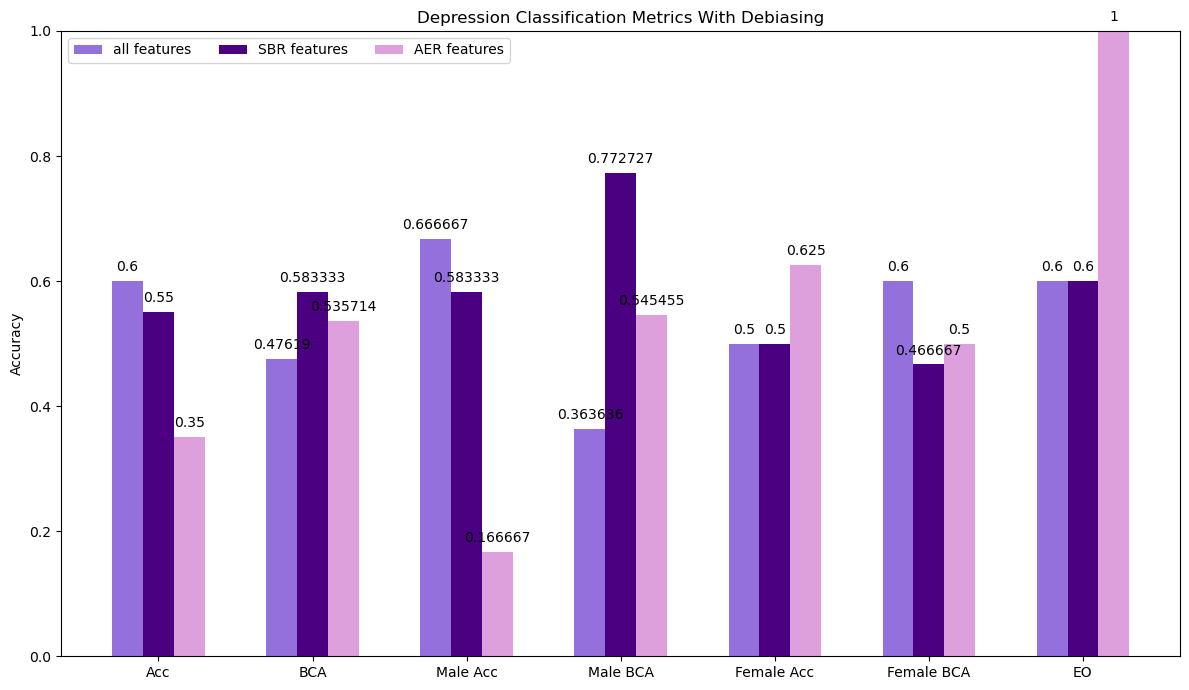

In [87]:
measures = ['Acc', 'BCA', 'Male Acc', 'Male BCA', 'Female Acc', 'Female BCA', 'EO']
vals = {
    'all features': [all['accuracy'], all['balanced_accuracy'], 
                     male['accuracy'], male['balanced_accuracy'], 
                     female['accuracy'], female['balanced_accuracy'], .6],
    'SBR features': [all_sbr['accuracy'], all_sbr['balanced_accuracy'], 
                     male_sbr['accuracy'], male_sbr['balanced_accuracy'], 
                     female_sbr['accuracy'], female_sbr['balanced_accuracy'], eo_sbr],
    'AER features': [all_aer['accuracy'], all_aer['balanced_accuracy'], 
                 male_aer['accuracy'], male_aer['balanced_accuracy'], 
                 female_aer['accuracy'], female_aer['balanced_accuracy'], eo_aer]
}
bar_graph(vals, measures, 'Depression Classification Metrics With Debiasing')